#**RNN**

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [0]:
# Parameters
n = 30              # Number of days
t = 6704            # Training set size (90% = 7542     |  80% = 6704    |  70% = 5866)
m = 5               # Number of hidden LSTM layers except first and last
u = 30              # Number of nodes in each hidden layer
d = 0.2             # Dropout fraction
b = 32              # Batch size
e = 10              # Number of epochs

In [0]:
# Importing the Dataset
dataset = pd.read_excel('Dataset_set_2_for_classification.xlsx')
dataset

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,YEAR,MONTH,DATE,RADIO FLUX,SUN SPOT NO,SUNSPOT AREA,X-RAY BACKGROUND FLUX,PROTON FLUENCES,PROTON FLUENCES,PROTON FLUENCES,ELECTRON FLUENCES,A,K-INDICES,K-INDICES,K-INDICES,K-INDICES,K-INDICES,K-INDICES,K-INDICES,K-INDICES,A,K-INDICES,K-INDICES,K-INDICES,K-INDICES,K-INDICES,K-INDICES,K-INDICES,K-INDICES,A,K-INDICES,K-INDICES,K-INDICES,K-INDICES,K-INDICES,K-INDICES,K-INDICES,K-INDICES,C,M,X,S,1,2,3,4,c,m,x,s,1,2,3,4,x-ray class,optical class
1,1997,6,2,77,35,120,4.5,340000,18000,4600,10000000,8,2,1,1,1,2,2,3,3,2,2,1,0,1,0,0,1,2,7,2,1,1,1,2,2,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1997,6,3,75,20,150,4.2,330000,18000,4400,17000000,11,3,2,3,2,2,3,3,2,6,3,3,2,1,2,1,0,0,10,3,3,4,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1997,6,4,74,16,110,3.6,350000,18000,4500,38000000,8,2,2,1,1,2,2,3,3,0,1,1,0,1,0,1,0,0,5,2,2,1,1,1,2,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1997,6,5,74,15,120,2.2,350000,19000,4600,61000000,4,1,1,1,1,1,1,2,2,0,0,0,1,0,0,0,0,0,3,1,1,1,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8375,2020,5,6,70,0,0,0,54000,46000,3200,1500000,6,3,2,1,1,2,1,2,0,3,3,2,0,0,1,0,0,0,6,3,2,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8376,2020,5,7,69,0,0,0,66000,46000,3200,1600000,5,0,1,2,1,3,1,1,1,9,1,2,3,4,3,1,0,1,4,1,1,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8377,2020,5,8,68,0,0,0,81000,46000,3200,1600000,4,1,0,1,1,3,0,1,1,2,1,1,0,2,0,0,0,0,4,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8378,2020,5,9,71,0,0,0,76000,46000,3200,1900000,3,1,0,0,1,2,2,1,1,0,0,0,0,0,0,0,0,0,3,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
x = dataset.iloc[1:, 0:46].values

y_c_train=dataset.iloc[n+1:t,38:39].values
y_m_train=dataset.iloc[n+1:t,39:40].values
y_x_train=dataset.iloc[n+1:t,40:41].values

y_c_test=dataset.iloc[t:,38:39].values
y_m_test=dataset.iloc[t:,39:40].values
y_x_test=dataset.iloc[t:,40:41].values

# Prediction c-class solar flares

In [0]:
y_train=y_c_train
y_test=y_c_test

In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
x = sc.fit_transform(x)

In [0]:
# Creating a data structure for training with n timesteps and 1 output
x_train = []
for i in range(n+1,t):
    temp=[]
    for j in range(i-30,i):
        temp.append(x[j,:])
    x_train.append(temp)
x_train = np.array(x_train)

In [0]:
# Creating a data structure for test with n timesteps and 1 output
x_test = []
for i in range(t,8380):
    temp=[]
    for j in range(i-30,i):
        temp.append(x[j,:])
    x_test.append(temp)
x_test = np.array(x_test)

In [0]:
#### Building the RNN ####

# Initialising the RNN
regressor_1 = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor_1.add(LSTM(units = u, return_sequences = True, input_shape = (x_train.shape[1], x_train.shape[2])))
regressor_1.add(Dropout(d))

# Adding LSTM layers between first and last layers and some Dropout regularisation
for i in range(m):
    regressor_1.add(LSTM(units = u, return_sequences = True))
    regressor_1.add(Dropout(d))

# Adding a last LSTM layer and some Dropout regularisation
regressor_1.add(LSTM(units = u))
regressor_1.add(Dropout(d))

# Adding the output layer
regressor_1.add(Dense(units = 1))

In [0]:
# Compiling the RNN
regressor_1.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [0]:
# Fitting the RNN to the Training set
regressor_1.fit(x_train, y_train, epochs = e, batch_size = b)

Epoch 1/10
6673/6673 [==============================] - 75s 11ms/step - loss: 15.1203
Epoch 2/10
6673/6673 [==============================] - 70s 10ms/step - loss: 14.1596
Epoch 3/10
6673/6673 [==============================] - 71s 11ms/step - loss: 11.3896
Epoch 4/10
6673/6673 [==============================] - 70s 11ms/step - loss: 10.6736
Epoch 5/10
6673/6673 [==============================] - 70s 10ms/step - loss: 10.2493
Epoch 6/10
6673/6673 [==============================] - 69s 10ms/step - loss: 10.4486
Epoch 7/10
6673/6673 [==============================] - 70s 10ms/step - loss: 10.1536
Epoch 8/10
6673/6673 [==============================] - 69s 10ms/step - loss: 10.0228
Epoch 9/10
6673/6673 [==============================] - 69s 10ms/step - loss: 9.8664
Epoch 10/10
6673/6673 [==============================] - 69s 10ms/step - loss: 9.3954


In [0]:
#### Making the predictions ####
y_pred = regressor_1.predict(x_test)
y_test_temp=y_test
y_test_temp=np.asarray(y_test_temp,dtype=int)
y_pred=np.asarray(y_pred,dtype=int)

In [0]:
for i in range(0,len(y_pred)):
  if y_pred[i]>=1:
    y_pred[i]=1
  else:
    y_pred[i]=0
  if y_test_temp[i]>=1:
    y_test_temp[i]=1
  else:
    y_test_temp[i]=0

In [0]:
# Confusion Matrix
cm = confusion_matrix(y_test_temp, y_pred)
cm

array([[998, 401],
       [ 52, 225]])

In [0]:
# Report
print(classification_report(y_test_temp, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.71      0.82      1399
           1       0.36      0.81      0.50       277

    accuracy                           0.73      1676
   macro avg       0.65      0.76      0.66      1676
weighted avg       0.85      0.73      0.76      1676



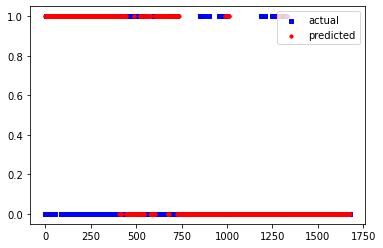

In [0]:
# Plotting the result
xAxis=[i for i in range(1676)]
fig = plt.figure()
ax1 = fig.add_subplot(111)
# y_pred and y_test_temp after modificaton
ax1.scatter(xAxis, y_test_temp, s=10, c='b', marker="s", label='actual')
ax1.scatter(xAxis,y_pred, s=10, c='r', marker="o", label='predicted')
plt.legend(loc='upper right');
plt.show()

# Prediction of m-class Solar flares

In [0]:
y_train=y_m_train
y_test=y_m_test

In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
x = sc.fit_transform(x)

In [0]:
# Creating a data structure for training with n timesteps and 1 output
x_train = []
for i in range(n+1,t):
    temp=[]
    for j in range(i-30,i):
        temp.append(x[j,:])
    x_train.append(temp)
x_train = np.array(x_train)

In [0]:
# Creating a data structure for test with n timesteps and 1 output
x_test = []
for i in range(t,8380):
    temp=[]
    for j in range(i-30,i):
        temp.append(x[j,:])
    x_test.append(temp)
x_test = np.array(x_test)

In [0]:
#### Building the RNN ####

# Initialising the RNN
regressor_1 = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor_1.add(LSTM(units = u, return_sequences = True, input_shape = (x_train.shape[1], x_train.shape[2])))
regressor_1.add(Dropout(d))

# Adding LSTM layers between first and last layers and some Dropout regularisation
for i in range(m):
    regressor_1.add(LSTM(units = u, return_sequences = True))
    regressor_1.add(Dropout(d))

# Adding a last LSTM layer and some Dropout regularisation
regressor_1.add(LSTM(units = u))
regressor_1.add(Dropout(d))

# Adding the output layer
regressor_1.add(Dense(units = 1))

In [0]:
# Compiling the RNN
regressor_1.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [0]:
# Fitting the RNN to the Training set
regressor_1.fit(x_train, y_train, epochs = e, batch_size = b)

Epoch 1/10
6673/6673 [==============================] - 67s 10ms/step - loss: 0.7358
Epoch 2/10
6673/6673 [==============================] - 65s 10ms/step - loss: 0.7185
Epoch 3/10
6673/6673 [==============================] - 65s 10ms/step - loss: 0.7166
Epoch 4/10
6673/6673 [==============================] - 65s 10ms/step - loss: 0.7110
Epoch 5/10
6673/6673 [==============================] - 65s 10ms/step - loss: 0.6978
Epoch 6/10
6673/6673 [==============================] - 65s 10ms/step - loss: 0.6598
Epoch 7/10
6673/6673 [==============================] - 64s 10ms/step - loss: 0.4821
Epoch 8/10
6673/6673 [==============================] - 64s 10ms/step - loss: 0.3075
Epoch 9/10
6673/6673 [==============================] - 65s 10ms/step - loss: 0.2528
Epoch 10/10
6673/6673 [==============================] - 64s 10ms/step - loss: 0.1950


In [0]:
#### Making the predictions ####
y_pred = regressor_1.predict(x_test)
y_test_temp=y_test
y_test_temp=np.asarray(y_test_temp,dtype=int)
y_pred=np.asarray(y_pred,dtype=int)

In [0]:
for i in range(0,len(y_pred)):
  if y_pred[i]>=1:
    y_pred[i]=1
  else:
    y_pred[i]=0
  if y_test_temp[i]>=1:
    y_test_temp[i]=1
  else:
    y_test_temp[i]=0

In [0]:
# Confusion Matrix
cm = confusion_matrix(y_test_temp, y_pred)
cm

array([[1640,    0],
       [  19,   17]])

In [0]:
# Report
print(classification_report(y_test_temp, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1640
           1       1.00      0.47      0.64        36

    accuracy                           0.99      1676
   macro avg       0.99      0.74      0.82      1676
weighted avg       0.99      0.99      0.99      1676



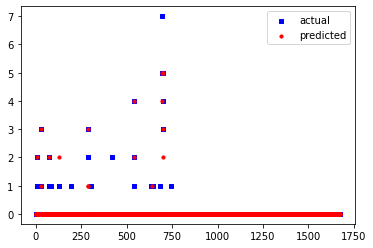

In [0]:
# Plotting the result
xAxis=[i for i in range(1676)]
fig = plt.figure()
ax1 = fig.add_subplot(111)
# y_pred and y_test before modificaton
ax1.scatter(xAxis, y_test, s=10, c='b', marker="s", label='actual')
ax1.scatter(xAxis,y_pred, s=10, c='r', marker="o", label='predicted')
plt.legend(loc='upper right');
plt.show()

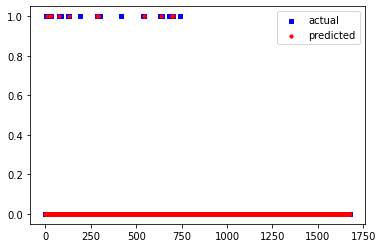

In [0]:
# Plotting the result
xAxis=[i for i in range(1676)]
fig = plt.figure()
ax1 = fig.add_subplot(111)
# y_pred and y_test_temp after modificaton
ax1.scatter(xAxis, y_test_temp, s=10, c='b', marker="s", label='actual')
ax1.scatter(xAxis,y_pred, s=10, c='r', marker="o", label='predicted')
plt.legend(loc='upper right');
plt.show()

# Prediction of x-class solar flares

In [0]:
y_train=y_x_train
y_test=y_x_test

In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
x = sc.fit_transform(x)

In [0]:
# Creating a data structure for training with n timesteps and 1 output
x_train = []
for i in range(n+1,t):
    temp=[]
    for j in range(i-30,i):
        temp.append(x[j,:])
    x_train.append(temp)
x_train = np.array(x_train)

In [0]:
# Creating a data structure for test with n timesteps and 1 output
x_test = []
for i in range(t,8380):
    temp=[]
    for j in range(i-30,i):
        temp.append(x[j,:])
    x_test.append(temp)
x_test = np.array(x_test)

In [0]:
#### Building the RNN ####

# Initialising the RNN
regressor_2 = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor_2.add(LSTM(units = u, return_sequences = True, input_shape = (x_train.shape[1], x_train.shape[2])))
regressor_2.add(Dropout(d))

# Adding LSTM layers between first and last layers and some Dropout regularisation
for i in range(m):
    regressor_2.add(LSTM(units = u, return_sequences = True))
    regressor_2.add(Dropout(d))

# Adding a last LSTM layer and some Dropout regularisation
regressor_2.add(LSTM(units = u))
regressor_2.add(Dropout(d))

# Adding the output layer
regressor_2.add(Dense(units = 1))

In [0]:
# Compiling the RNN
regressor_2.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [0]:
# Fitting the RNN to the Training set
regressor_2.fit(x_train, y_train, epochs = e, batch_size = b)

Epoch 1/10
6673/6673 [==============================] - 67s 10ms/step - loss: 0.0331
Epoch 2/10
6673/6673 [==============================] - 66s 10ms/step - loss: 0.0330
Epoch 3/10
6673/6673 [==============================] - 65s 10ms/step - loss: 0.0329
Epoch 4/10
6673/6673 [==============================] - 65s 10ms/step - loss: 0.0329
Epoch 5/10
6673/6673 [==============================] - 65s 10ms/step - loss: 0.0327
Epoch 6/10
6673/6673 [==============================] - 65s 10ms/step - loss: 0.0327
Epoch 7/10
6673/6673 [==============================] - 65s 10ms/step - loss: 0.0326
Epoch 8/10
6673/6673 [==============================] - 65s 10ms/step - loss: 0.0322
Epoch 9/10
6673/6673 [==============================] - 65s 10ms/step - loss: 0.0319
Epoch 10/10
6673/6673 [==============================] - 65s 10ms/step - loss: 0.0296


In [0]:
#### Making the predictions ####
y_pred = regressor_2.predict(x_test)
y_test_temp=y_test
y_test_temp=np.asarray(y_test_temp,dtype=int)
y_pred=np.asarray(y_pred,dtype=int)

In [0]:
for i in range(0,len(y_pred)):
  if y_pred[i]>=1:
    y_pred[i]=1
  else:
    y_pred[i]=0
  if y_test_temp[i]>=1:
    y_test_temp[i]=1
  else:
    y_test_temp[i]=0

In [0]:
# Confusion Matrix
cm = confusion_matrix(y_test_temp, y_pred)
cm

array([[1673,    0],
       [   1,    2]])

In [0]:
# Report
print(classification_report(y_test_temp, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1673
           1       1.00      0.67      0.80         3

    accuracy                           1.00      1676
   macro avg       1.00      0.83      0.90      1676
weighted avg       1.00      1.00      1.00      1676



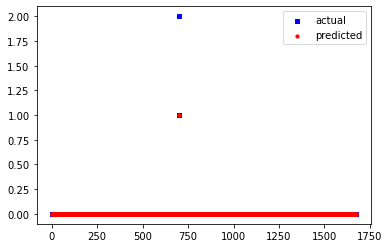

In [0]:
# Plotting the result
xAxis=[i for i in range(1676)]
fig = plt.figure()
ax1 = fig.add_subplot(111)
# y_pred and y_test before modificaton
ax1.scatter(xAxis, y_test, s=10, c='b', marker="s", label='actual')
ax1.scatter(xAxis,y_pred, s=10, c='r', marker="o", label='predicted')
plt.legend(loc='upper right');
plt.show()

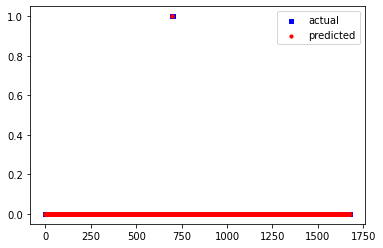

In [0]:
# Plotting the result
xAxis=[i for i in range(1676)]
fig = plt.figure()
ax1 = fig.add_subplot(111)
# y_pred and y_test_temp after modificaton
ax1.scatter(xAxis, y_test_temp, s=10, c='b', marker="s", label='actual')
ax1.scatter(xAxis,y_pred, s=10, c='r', marker="o", label='predicted')
plt.legend(loc='upper right');
plt.show()